<a href="https://colab.research.google.com/github/Viveekk17/AI---FEATURE-ENGINEERING/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

# 1. Load the dataset
# Make sure 'Results.csv' is uploaded to the files folder on the left
df = pd.read_csv('Results.csv')

# 2. RENAME THE COLUMNS (This fixes your KeyError)
df.columns = [
    'election_id',
    'event_number',
    'electoral_district_id',
    'polling_station_id',
    'ballot_sequence',
    'vote_count'
]

# 3. Verify it worked
print("Columns renamed successfully!")
print(df.head())

/tmp/ipython-input-2956424364.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Results.csv')


Columns renamed successfully!
  election_id  event_number electoral_district_id polling_station_id  \
0  GE.37.2000          3700              ED48-001                1-1   
1  GE.37.2000          3700              ED48-001                 10   
2  GE.37.2000          3700              ED48-001                100   
3  GE.37.2000          3700              ED48-001                101   
4  GE.37.2000          3700              ED48-001                102   

   ballot_sequence  vote_count  
0                1         149  
1                1           0  
2                1          23  
3                1          58  
4                1          34  


In [11]:
# Take a random sample of 10,000 rows
df_sample = df.sample(n=10000, random_state=42).copy()

print(f"Sample created with {df_sample.shape[0]} rows.")

Sample created with 10000 rows.


In [12]:
from sklearn.preprocessing import LabelEncoder

# Identify the text columns
cat_cols = ['election_id', 'electoral_district_id', 'polling_station_id']
le = LabelEncoder()

# Convert them to numbers
for col in cat_cols:
    # Convert column to string first to avoid errors
    df_sample[col] = df_sample[col].astype(str)
    # Create the encoded column
    df_sample[f'{col}_encoded'] = le.fit_transform(df_sample[col])

print("Encoding complete. New columns added.")

Encoding complete. New columns added.


In [13]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns
num_cols = ['event_number', 'ballot_sequence', 'vote_count']
scaler = StandardScaler()

# Scale them
scaled_cols = [f'{col}_scaled' for col in num_cols]
df_sample[scaled_cols] = scaler.fit_transform(df_sample[num_cols])

print("Feature scaling complete.")
print(df_sample[scaled_cols].head())

Feature scaling complete.
         event_number_scaled  ballot_sequence_scaled  vote_count_scaled
2689387             1.368772                0.290004          -0.130968
157859             -1.549303               -0.244960           0.468970
1642338            -0.090266                0.824968           2.057042
1923511            -1.062957                0.290004          -0.677971
775972              0.882426                0.290004          -0.501518


In [14]:
from sklearn.decomposition import PCA

# Combine encoded and scaled features
features = scaled_cols + [f'{col}_encoded' for col in cat_cols]
X = df_sample[features]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_sample['PCA_1'] = pca_result[:, 0]
df_sample['PCA_2'] = pca_result[:, 1]

print("PCA Complete. Explained Variance:", pca.explained_variance_ratio_)

PCA Complete. Explained Variance: [0.79460834 0.20533207]


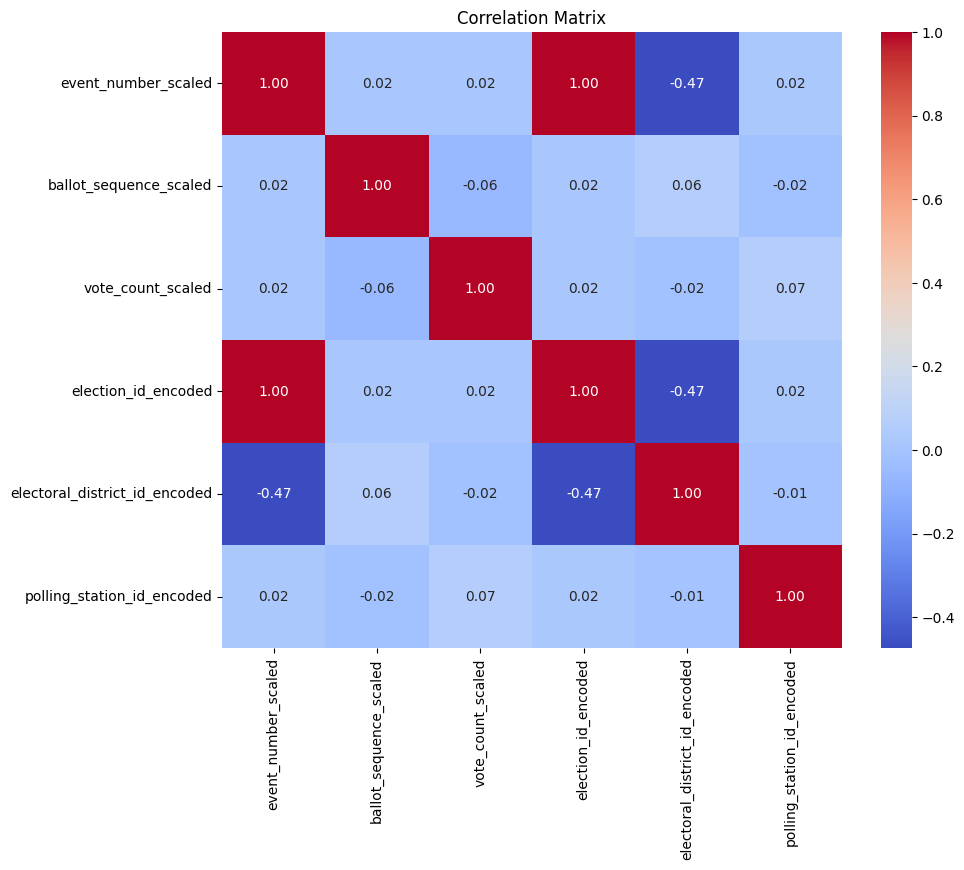

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_sample[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()